# Presentación final

Los datos que presentaré a continuación fueron obtenidos de DataMéxico. Lo que describen es la evolución de los salarios y el número de funcionarios de cinco distintas ingenierías a lo largo del tiempo.

El tiempo lo dividen en cuartiles y aborda desde el tercer cuarto del año 2012 hasta el segundo cuarto del 2021. Las ingenierías que incluye son:
- Ingeniería química
- Ingeniería civil
- Ingeniería en minas y metalurgia
- Ingeniería mecánica
- Ingeniería industrial

Las variables son:
- Occupation (categórica): el tipo de ingeniería
- Quarter (discreta): el cuartil del año en cuestión, desde el tercer cuarto del año 2012 hasta el segundo cuarto del 2021
- Workforce (discreta): el número de funcionarios ejerciendo la ingeniería
- Monthly Wage (discreta): salario mensual

In [1]:
#pip install seaborn

In [2]:
#pip install sklearn

In [3]:
#pip install statsmodels

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [5]:
%ls

 00_00_binder.ipynb
 00_00_primer_pasos.ipynb
 01_01_data_types.ipynb
 01_02_read_iloc_unique_groupby.ipynb
 02_00_data_wrangling.ipynb
 02_01_null_display.ipynb
 02_02_basic_math.ipynb
 a01570468_pres_interm.ipynb
 A3.ipynb
 A5.ipynb
'A7 (1).ipynb'
 A9.ipynb
 adult.csv
 antropometria-dataset-1.csv
 antropometria-dataset-2.csv
 antropometria-dataset.csv
 clase1.ipynb
 Clase3.ipynb
 Clase4.ipynb
 Clase5.ipynb
 Clase7.ipynb
 Clase8.2.ipynb
 Clase8.ipynb
 Clase9.ipynb
 datasets/
'datos multivariante.xlsx'
 Evolucion-poblacion-ocupada-trabajadores-totales.csv
 README.md
 reg_data.csv
 requirements.txt


In [17]:
df = pd.read_csv('Evolucion-poblacion-ocupada-trabajadores-totales.csv')


In [18]:
df = df.drop(['Occupation ID', 'Quarter ID', 'Time', 'type ID', 'type'], axis = 1)


In [19]:
df.head(2)

,Occupation,Quarter,Workforce,Monthly Wage
0,Ingenieros Químicos,2012-Q3,20316,10569.376354
1,Ingenieros Químicos,2012-Q4,17082,6104.720173


# Pregunta de investigación #1
¿Cómo es la evolución del salario de un ingeniero industrial?

In [20]:
df = df.set_index('Quarter')

In [10]:
ii = df.loc[df['Occupation'] == 'Ingenieros Industriales', 'Monthly Wage']
iq = df.loc[df['Occupation'] == 'Ingenieros Químicos', 'Monthly Wage']
ic = df.loc[df['Occupation'] == 'Ingenieros Civiles y de la Construcción', 'Monthly Wage']
ip = df.loc[df['Occupation'] == 'Ingenieros en Minas, Metalurgia y Petróleo', 'Monthly Wage']
im = df.loc[df['Occupation'] == 'Ingenieros Mecánicos', 'Monthly Wage']

Text(0.5, 1.0, 'Evolución del salario de un ingeniero industrial')

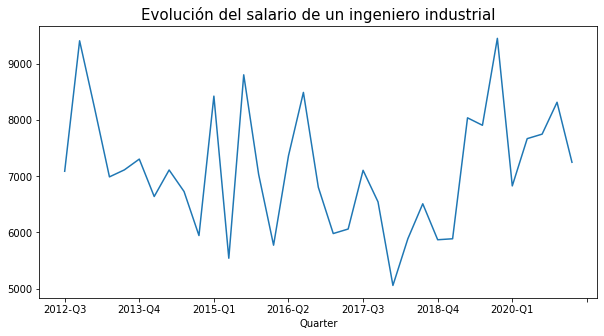

In [11]:
ii.plot(figsize = (10,5))
plt.title('Evolución del salario de un ingeniero industrial', fontsize = 15)

## Conclusión

El salario de los ingenieros industriales tiene tendencia de disminución a partir de 2021 aproximadamente

# Pregunta de investigación #2
¿Cuál de las cinco ingenierías tiene la mejor evolución después de la pandemia?

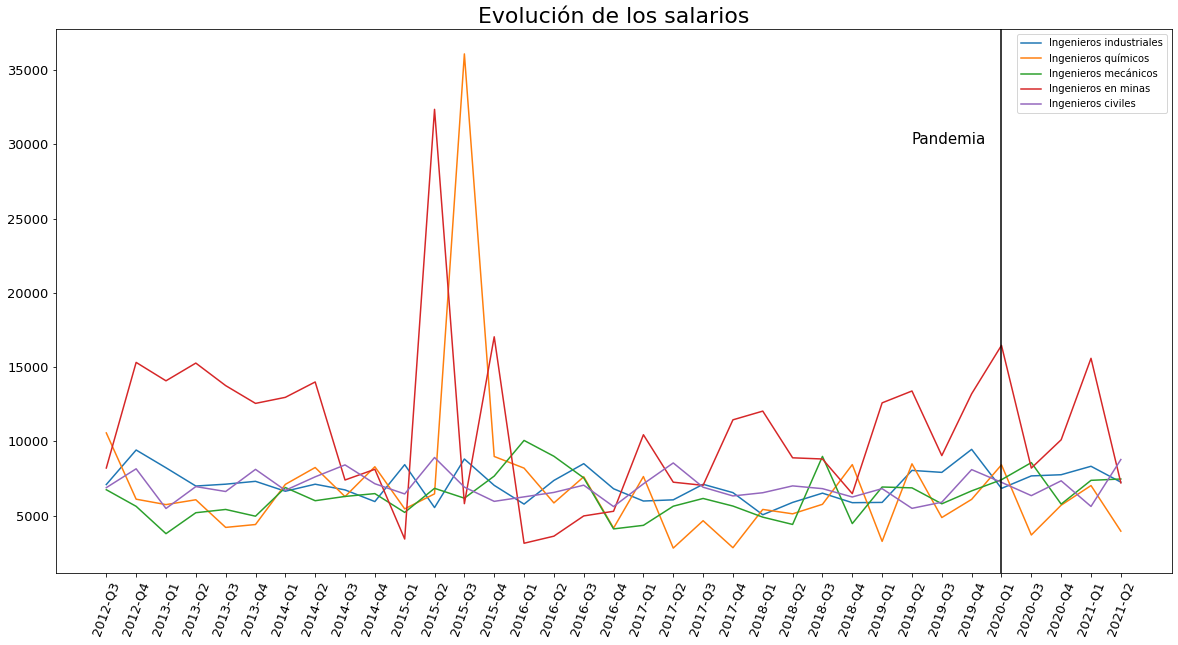

In [12]:
plt.figure(figsize = (20,10))

plt.plot(ii, label = 'Ingenieros industriales')
plt.plot(iq, label = 'Ingenieros químicos')
plt.plot(im, label = 'Ingenieros mecánicos')
plt.plot(ip, label = 'Ingenieros en minas')
plt.plot(ic, label = 'Ingenieros civiles')

plt.title('Evolución de los salarios', fontsize = 22)
plt.xticks(rotation = 70, fontsize = 13)
plt.yticks(fontsize = 13)

plt.axvline(x = '2020-Q1', color = 'k')
plt.text(27, 30000, 'Pandemia', fontsize = 15)

plt.legend()
plt.show()

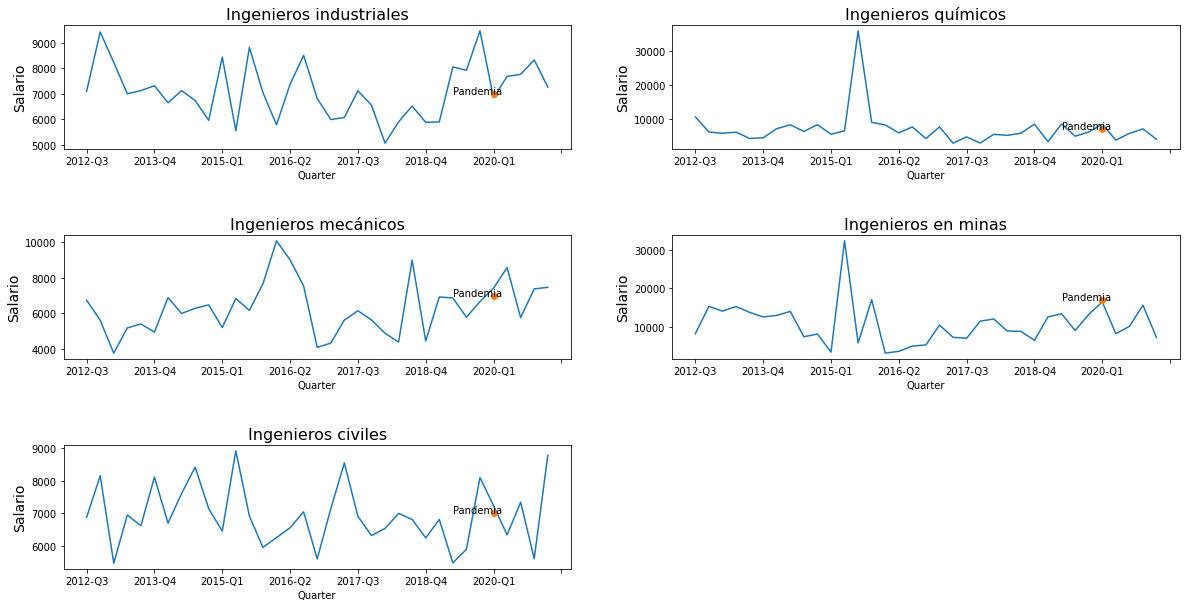

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 2, 1) #1 columna, 2 renglones, posicion 1
ii.plot(figsize = (20,10))
plt.title('Ingenieros industriales', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)
plt.text(27, 7000, 'Pandemia')
plt.plot(30, 7000, 'o')


ax2 = fig.add_subplot(3, 2, 2) #1 columna, 2 renglones, posicion 2
iq.plot(figsize = (20,10))
plt.title('Ingenieros químicos', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)
plt.text(27, 7000, 'Pandemia')
plt.plot(30, 7000, 'o')

ax3 = fig.add_subplot(3, 2, 3) #1 columna, 2 renglones, posicion 2
im.plot(figsize = (20,10))
plt.title('Ingenieros mecánicos', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)
plt.text(27, 7000, 'Pandemia')
plt.plot(30, 7000, 'o')

ax4 = fig.add_subplot(3, 2, 4) #1 columna, 2 renglones, posicion 2
ip.plot(figsize = (20,10))
plt.title('Ingenieros en minas', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)
plt.text(27, 17000, 'Pandemia')
plt.plot(30, 17000, 'o')

ax5 = fig.add_subplot(3, 2, 5) #1 columna, 2 renglones, posicion 2
ic.plot(figsize = (20,10))
plt.title('Ingenieros civiles', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)
plt.text(27, 7000, 'Pandemia')
plt.plot(30, 7000, 'o')

fig.subplots_adjust(hspace=.7)

## Conclusiones
De las gráficas de línea puedo observar que las carreras que tuvieron buen desempeño a pesar de la pandemia son los ingenieros industriales y los mecánicos. Los demás muestran un decrecimiento en su salario. Sin embargo, la carrera de ingeniería civil muestra una tendencia excelente de crecimiento salarial aproximadamente un año después. Ellos, junto con los mecánicos, son los únicos que muestran una tendencia positiva al terminar el segundo cuarto del 2021.

# Pregunta de investigación #3
¿Cuál de las ingenierías tiene mayor sueldo en promedio?

In [14]:
my_pivot = pd.pivot_table(df,
                          index = 'Occupation',
                          values = 'Monthly Wage',
                          #aggfunc = ['std','sum','mean','median']
                          aggfunc = 'mean',
                          margins = True
                         )
my_pivot

,Monthly Wage
Occupation,
Ingenieros Civiles y de la Construcción,6941.334691
Ingenieros Industriales,7113.893037
Ingenieros Mecánicos,6323.481937
Ingenieros Químicos,6970.578761
"Ingenieros en Minas, Metalurgia y Petróleo",10729.567045
All,7615.771094


In [15]:
sueldos = my_pivot.drop('All', axis = 0)

Text(0.5, 1.0, 'Salarios promedios')

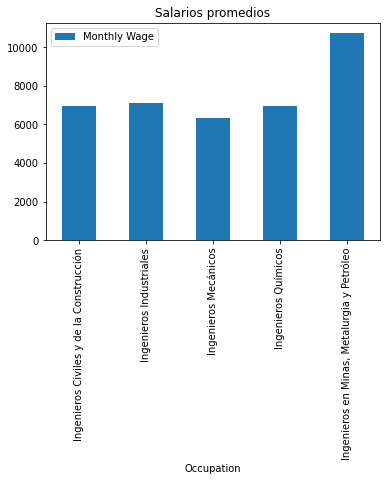

In [16]:
sueldos.plot(kind = 'bar')

plt.title('Salarios promedios')


## Conclusiones
La carrera con mayor sueldo es la ingeniería en minas, metalurgia y petróleo. En segundo lugar están los ingenieros industriales. El último puesto lo toman los ingenieros mecánicos.

# Pregunta de investigación #4
¿Cuál es el impacto del número de funcionarios en el salario mensual de las ingenierías?

Función base: MonthlyWage = b0 + b1*Workforce

In [24]:
df.rename(columns = {'Monthly Wage': 'MonthlyWage',      #Renombrar columnas
                    },
          inplace = True)

In [25]:
modelA = sm.OLS.from_formula('MonthlyWage~Workforce', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyWage   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     7.632
Date:                Fri, 03 Dec 2021   Prob (F-statistic):            0.00635
Time:                        06:29:11   Log-Likelihood:                -1689.0
No. Observations:                 175   AIC:                             3382.
Df Residuals:                     173   BIC:                             3388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8628.6347    464.998     18.556      0.000    7710.835    9546.435
Workforce     -0.0250      0.009     -2.763      0.006      -0.043      -0.007
==============================================================================
Omnibus:                      181.853   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4784.330
Skew:                           3.919   Prob(JB):                         0.00
Kurtosis:                      27.387   Cond. No.                     8.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

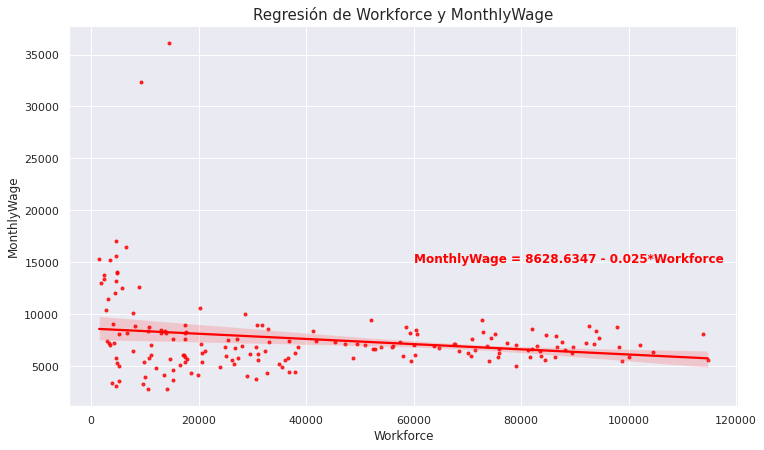

In [28]:
plt.figure(figsize = (12,7))
sns.set(font_scale = 1)

reg_plot = sns.regplot(x = 'Workforce',
            y = 'MonthlyWage',
            data = df,
            color = 'red',
            marker = '.')

reg_plot.set_title('Regresión de Workforce y MonthlyWage', fontsize = 15)
reg_plot.text(60000, 15000, 'MonthlyWage = 8628.6347 - 0.025*Workforce',
              color = 'red',
              weight = 'semibold',
              size = 'medium')

plt.show()

## Observaciones
* R-squared: es de 0.042, lo cual indica que el modelo no es confiable ya que sólo el 4% de los datos se ajustó al modelo.
* La variable dependiente es MonthlyWage
* La variable independiente es Workforce
* El modelo tiene 1 grado de libertad

# Conclusión
Concluimos que no es óptimo utilizar la variable de Workforce para predecir el MonthlyWage, ya que el modelo de regresión no muestra un buen ajuste. A pesar de eso, en la gráfica vemos una ligera tendencia negativa; es decir, entre más funcionarios el salario parece disminuir.

# Pregunta de investigación #5
¿Cómo se comportan los residuales de la regresión?

In [33]:
z = resultA.resid
z.describe()

count    1.750000e+02
mean     8.315380e-13
std      3.772771e+03
min     -5.554732e+03
25%     -1.774924e+03
50%     -2.925931e+02
75%      8.405268e+02
max      2.783356e+04
dtype: float64

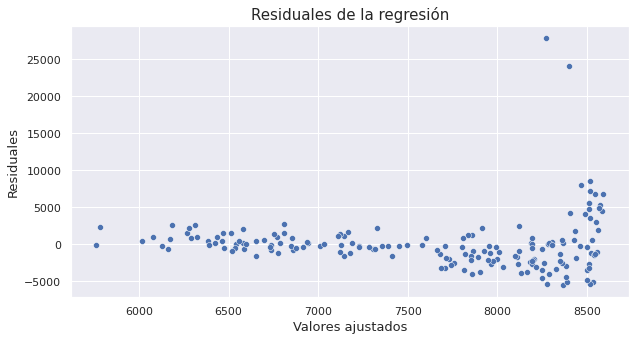

In [45]:
plt.figure(figsize = (10,5))

resi_plot = sns.scatterplot(x = resultA.fittedvalues,
                            y = resultA.resid)
resi_plot.set_title('Residuales de la regresión', fontsize = 15)
resi_plot.set_xlabel('Valores ajustados', fontsize = 13)
resi_plot.set_ylabel('Residuales', fontsize = 13)

plt.show()

## Conclusiones
Los residuales no se comportan con distribución normal y encontramos múltiples valores atípicos. Muestran una tendencia negativa.

### Limitaciones

- Sólo toma en cuenta cinco ingenierías
- Es del 2012 al 2021 únicamente
- No se investigaron los datos atípicos
- No se calcularon cuantitativamente las tendencias
